https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv

World Happiness Report


The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.


Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.


The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 





The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 






In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNetCV


from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore
from scipy import stats

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [3]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309882,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

no missing values

In [6]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Country and region columns are categorical and doesnt help in predicting the happiness score
So dropped the country and region columns

The problem is to predict the happiness score on various parameters, but the standard error is not a real time feature for predicting the happiness score.
So dropping that feature.


Happiness Rank is based on the prediction of Happiness Score, So Happiness Rank should also be ignored while training.

In [7]:
df.drop(['Country','Region','Standard Error','Happiness Rank'],axis=1,inplace=True)

In [8]:
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [9]:
df['Happiness Score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

The target dependent variable is the continuous variable. so it is a Regression Problem.

In [10]:
df.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309882,2.462415
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


## checking for outliers

In [11]:
zScores=np.abs(zscore(df))
zScores

array([[1.93736005, 1.36962124, 1.32028142, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.91458063, 1.13522625, 1.51445776, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.88479215, 1.19286069, 1.36105403, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [2.0761992 , 0.45524543, 1.90108634, ..., 0.38141902, 1.85689094,
        3.20843049],
       [2.1646885 , 2.06756644, 2.1184666 , ..., 0.35771452, 0.31694987,
        0.48198451],
       [2.22251319, 1.58633379, 3.13472485, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [12]:
filteredEntries=(zScores<3).all(axis=1)
filteredEntries

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [13]:
np.sum(filteredEntries)

152

In [14]:
6/152

0.039473684210526314

only 3% data is outliers so removing them

In [15]:
df=df[filteredEntries]


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 156
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                152 non-null    float64
 1   Economy (GDP per Capita)       152 non-null    float64
 2   Family                         152 non-null    float64
 3   Health (Life Expectancy)       152 non-null    float64
 4   Freedom                        152 non-null    float64
 5   Trust (Government Corruption)  152 non-null    float64
 6   Generosity                     152 non-null    float64
 7   Dystopia Residual              152 non-null    float64
dtypes: float64(8)
memory usage: 10.7 KB


## EDA

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

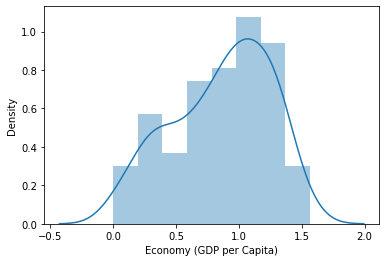

In [17]:
sns.distplot(df['Economy (GDP per Capita)'])

Economy (GDP per Capita) has some skewness

<AxesSubplot:xlabel='Family', ylabel='Density'>

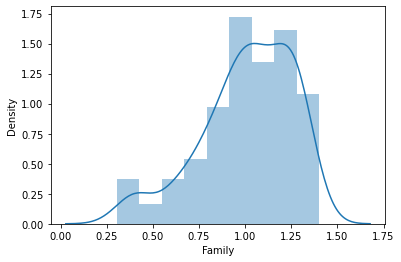

In [18]:
sns.distplot(df['Family'])

'Family' feature has some skewness

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

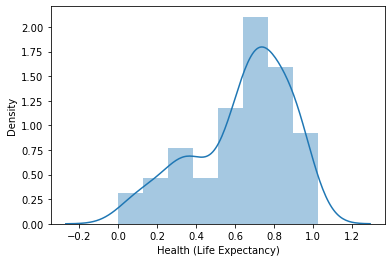

In [19]:
sns.distplot(df['Health (Life Expectancy)'])

Health (Life Expectancy) is skewed

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

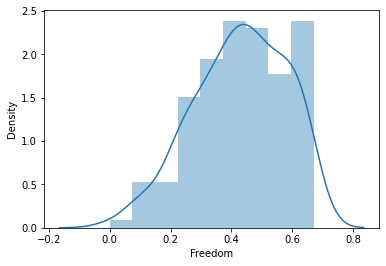

In [20]:
sns.distplot(df['Freedom'])

Freedom is skewed

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

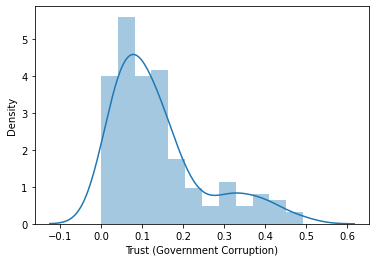

In [21]:
sns.distplot(df['Trust (Government Corruption)'])

Trust (Government Corruption) is  skewed

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

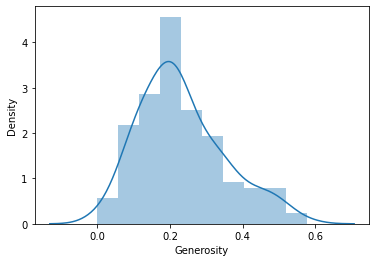

In [22]:
sns.distplot(df['Generosity'])

Generosity is skewed

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

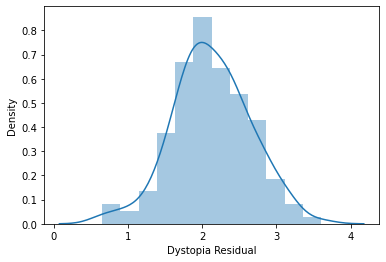

In [23]:
sns.distplot(df['Dystopia Residual'])

Dystopia Residual is normally distributed

Economy (GDP per Capita), Freedom are somewhat skewed
Family,  Health (Life Expectancy), Trust (Government Corruption),Generosity are more skewed
Dystopia Residual is normally distributed

## removing skewness

In [24]:
df.columns

Index(['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [25]:
for column in df.columns[1:]:
    print(column , df[column].skew())

Economy (GDP per Capita) -0.40110986024728973
Family -0.8153560664142688
Health (Life Expectancy) -0.733452806381519
Freedom -0.4062105107769091
Trust (Government Corruption) 1.2872704272979796
Generosity 0.6465787757917084
Dystopia Residual -0.04557789289527466


In [26]:
def min_skewness(colu):
    min_Skew=np.abs(df[colu].skew())
    print("initial",min_Skew)
    
    box_col_Skew=10
    min_SkewType=""
    log_col=np.log(df[colu])
    sqrt_col=np.sqrt(df[colu])
    try:
        box_col=stats.boxcox(df[colu])[0]
        box_col_Skew=np.abs(pd.Series(box_col).skew())
        print(box_col_Skew)

    except ValueError:
        print("hi")
    
    log_col_Skew=np.abs(log_col.skew())
    sqrt_col_Skew=np.abs(sqrt_col.skew())
    
    print(log_col_Skew)
    print(sqrt_col_Skew)
    
    if log_col_Skew<min_Skew:
        min_SkewType="log"
        min_Skew=log_col_Skew
    if sqrt_col_Skew<min_Skew:
        min_SkewType="sqrt"
        min_Skew=sqrt_col_Skew
    if box_col_Skew<min_Skew:
        min_SkewType="box"
        min_Skew=box_col_Skew
    print(min_Skew)
    print(column,"=",min_SkewType)
        



In [27]:
for column in df.columns[1:]:
    print(column)
    min_skewness(column)
    print("="*20)

Economy (GDP per Capita)
initial 0.40110986024728973
hi
nan
1.1101267441942222
0.40110986024728973
Economy (GDP per Capita) = 
Family
initial 0.8153560664142688
0.21571872390559513
1.6183393377893163
1.1863816157472695
0.21571872390559513
Family = box
Health (Life Expectancy)
initial 0.733452806381519
hi
nan
1.423779975777682
0.733452806381519
Health (Life Expectancy) = 
Freedom
initial 0.4062105107769091
hi
nan
1.2966294630158677
0.4062105107769091
Freedom = 
Trust (Government Corruption)
initial 1.2872704272979796
hi
nan
0.4470614679846128
0.4470614679846128
Trust (Government Corruption) = sqrt
Generosity
initial 0.6465787757917084
hi
nan
0.3033877835278313
0.3033877835278313
Generosity = sqrt
Dystopia Residual
initial 0.04557789289527466
0.019450063643368418
1.21387569652175
0.558858909615847
0.019450063643368418
Dystopia Residual = box


based on the above output apply the transformation as below as they give minimum skew.
Family = box,
Trust (Government Corruption) = sqrt
Generosity = sqrt
Dystopia Residual = box


In [28]:
df['Family']= stats.boxcox(df['Family'])[0]
df['Trust (Government Corruption)']=np.sqrt(df['Trust (Government Corruption)'])
df['Generosity']=np.sqrt(df['Generosity'])
df['Dystopia Residual']=stats.boxcox(df['Dystopia Residual'])[0]


In [29]:
for column in df.columns[1:]:
    print(column , df[column].skew())

Economy (GDP per Capita) -0.40110986024728973
Family -0.21571872390559513
Health (Life Expectancy) -0.733452806381519
Freedom -0.4062105107769091
Trust (Government Corruption) 0.4470614679846128
Generosity -0.3033877835278313
Dystopia Residual 0.019450063643368418


<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

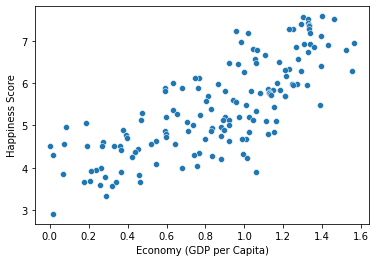

In [30]:
sns.scatterplot(data=df,x='Economy (GDP per Capita)',y='Happiness Score')

as the GDP is increasing Happiness Score increases

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

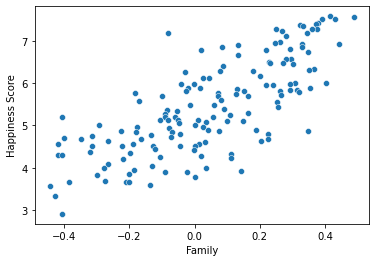

In [31]:
sns.scatterplot(data=df,x='Family',y='Happiness Score')

as the Family score increases happiness increases, there seems to be some outliers as 

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

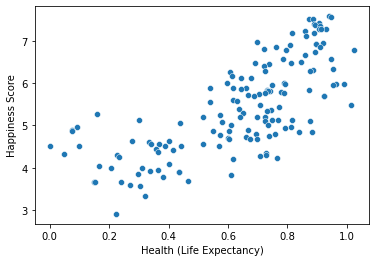

In [32]:
sns.scatterplot(data=df,x='Health (Life Expectancy)',y='Happiness Score')

as the Health (Life Expectancy) increases happiness increases

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

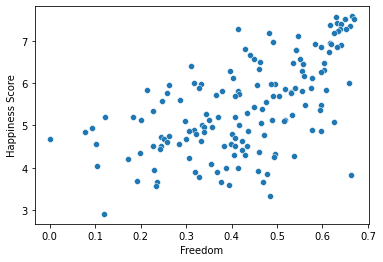

In [33]:
sns.scatterplot(data=df,x='Freedom',y='Happiness Score')

as the Freedom increases happiness increases

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

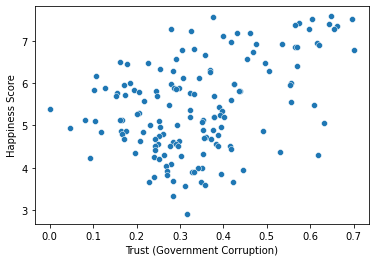

In [34]:
sns.scatterplot(data=df,x='Trust (Government Corruption)',y='Happiness Score')

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

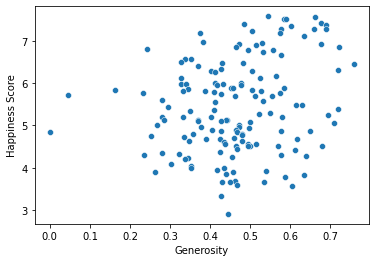

In [35]:
sns.scatterplot(data=df,x='Generosity',y='Happiness Score')

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

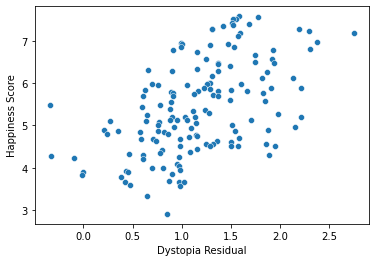

In [36]:
sns.scatterplot(data=df,x='Dystopia Residual',y='Happiness Score')

In [37]:
y=df['Happiness Score']
x=df.drop('Happiness Score',axis=1)

## identifying the best random state

In [38]:
minRMSE="null"
minRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    RMSE=np.sqrt(mean_squared_error(y_test,pred))
    if(minRMSE=="null" or RMSE<minRMSE):
        minRMSE=RMSE
        minRS=i
        
print("min RMSE is",minRMSE,"on random state",minRS)

min RMSE is 0.040859754254051105 on random state 11


min RMSE is 0.040859754254051105 on random state 11

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=11)


In [40]:
def rmseValue(model,indepen,depend):
    y_pred=model.predict(indepen)
    return np.sqrt(mean_squared_error(y_pred,depend))

In [41]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
lrRMSE=np.sqrt(mean_squared_error(y_test,pred))
lrRMSE

0.040859754254051105

In [42]:
svr=SVR()
svr.fit(X_train,y_train)
pred=svr.predict(X_test)
svrRMSE=np.sqrt(mean_squared_error(y_test,pred))
svrRMSE




0.13735442148750276

In [43]:
sgd=SGDRegressor()
sgd.fit(X_train,y_train)
pred=sgd.predict(X_test)
sgdRMSE=np.sqrt(mean_squared_error(y_test,pred))
sgdRMSE




0.188402136154449

In [44]:
knnR=KNeighborsRegressor()
knnR.fit(X_train,y_train)
pred=knnR.predict(X_test)
knnrRMSE=np.sqrt(mean_squared_error(y_test,pred))
knnrRMSE

0.20997823790135217

## frinding cross val score for each model

In [45]:
lrCV=cross_val_score(lr,x,y,cv=5,scoring=rmseValue).mean()
lrCV

0.06338782443927762

In [46]:
svrCV=cross_val_score(svr,x,y,cv=5,scoring=rmseValue).mean()
svrCV

0.3239319732987517

In [47]:
sgdCV=cross_val_score(sgd,x,y,cv=5,scoring=rmseValue).mean()
sgdCV

0.22017761032607192

In [48]:
knnrCV=cross_val_score(knnR,x,y,cv=5,scoring=rmseValue).mean()
knnrCV

0.5593476014264419

In [49]:
print(lrRMSE-lrCV)
print(svrRMSE-svrCV)
print(sgdRMSE-sgdCV)
print(knnrRMSE-knnrCV)

-0.02252807018522652
-0.1865775518112489
-0.03177547417162291
-0.34936936352508974


Linear Regression is the best method, as the difference between  is less (-0.02252807018522652)

In [50]:
lrRMSE

0.040859754254051105

## Hyper Parameter Tuning

Linear Regression is the best method, as the difference between  is less (-0.02252807018522652)

In [52]:
model = LinearRegression()
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [53]:
grid = GridSearchCV(model,param_grid)
grid.fit(x, y)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [55]:
grid.best_estimator_

LinearRegression()

In [56]:
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

## Training with best params

In [57]:
Final_model=LinearRegression(copy_X=True,fit_intercept=True,normalize=False)
Final_model.fit(X_train,y_train)
pred=Final_model.predict(X_test)


In [58]:
finalRMSE=np.sqrt(mean_squared_error(y_test,pred))
finalRMSE

0.040859754254051105

final error of the score is only 0.040 which is very less

## saving the model


In [59]:
import joblib
joblib.dump(Final_model,"Final_model_LR.pkl")

['Final_model_LR.pkl']